In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [18]:
train = pd.read_csv(r'C:\Users\User\Desktop\web-traffic-time-series-forecasting\train_1.csv\train_1.csv',engine='python')

In [19]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [20]:
train.fillna(0)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


Does language affect website traffic?

In [53]:
def get_language(page):
    res = re.search('([a-z][a-z])(.wikipedia.org)',page)
    #print(res.group(0))
    if res:
        #print(res.group(0))
        return res.group(0)[0:2]
    return 'na'
get_language(train['Page'][0])
train['lang'] = train.Page.map(get_language)
#train['Page'][0]
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,lang
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh


English wikipedia websited were the most visited followed by japanese and german.

In [55]:
from collections import Counter

print(Counter(train.lang))

Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [101]:
def get_language(page):
    res = re.search('([a-z][a-z])(.wikipedia.org)',page)
    #print(res.group(0))
    if res:
        #print(res.group(0))
        return res.group(0)[0:2]
    return 'na'
get_language(train['Page'][0])
train['lang'] = train.Page.map(get_language)
#train['Page'][0]
train.head()


lang_sets = {}
lang_sets['en'] = train[train.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train[train.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train[train.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train[train.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train[train.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train[train.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train[train.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train[train.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]


KeyboardInterrupt



In [ ]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

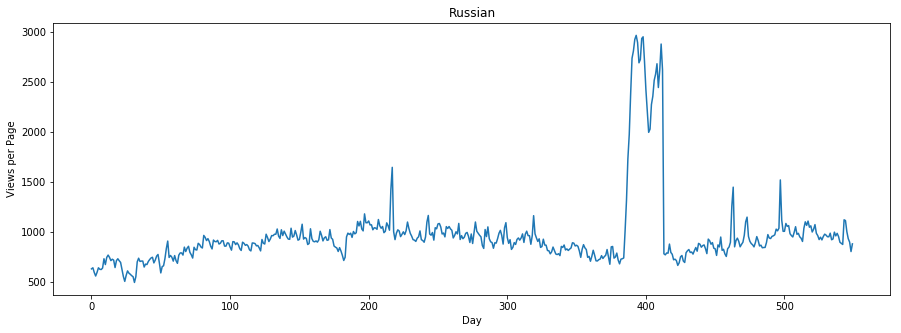

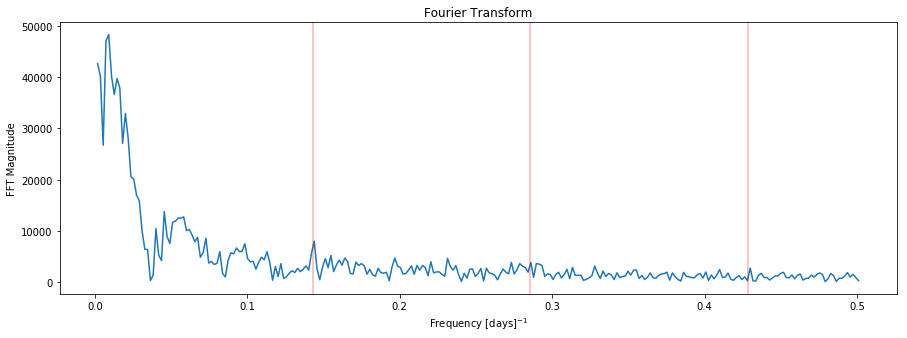

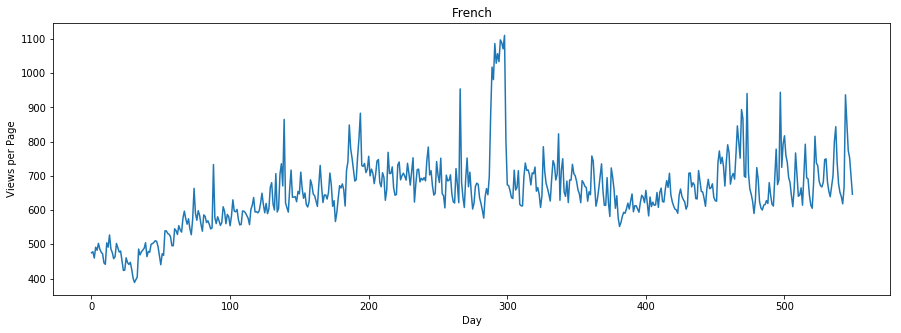

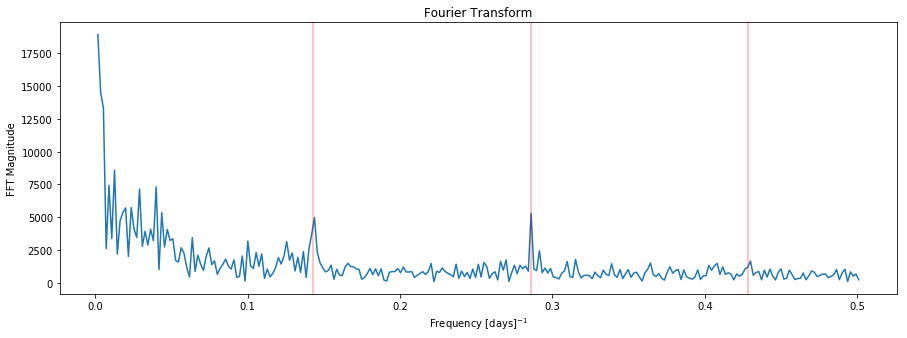

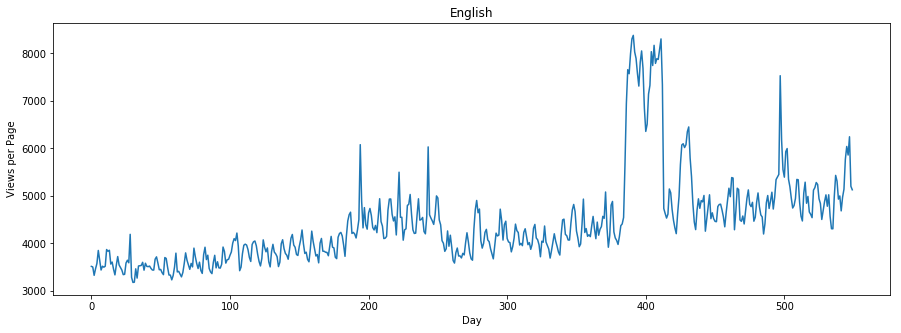

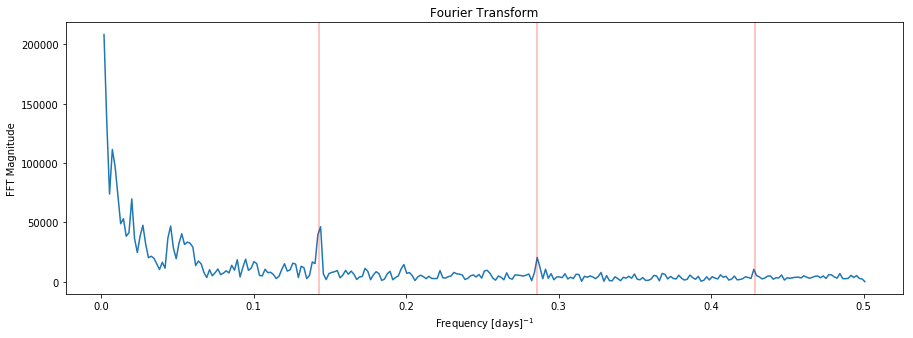

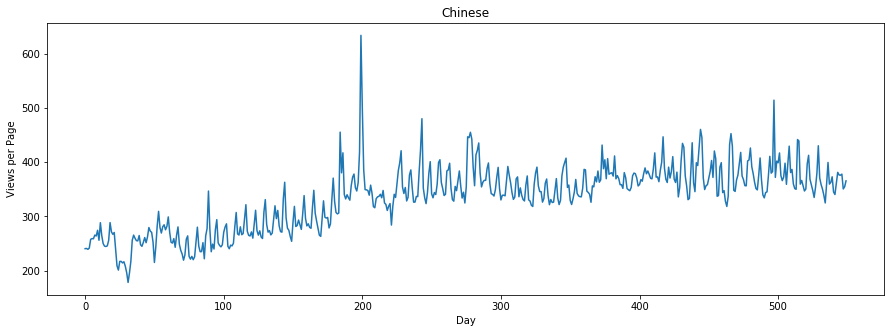

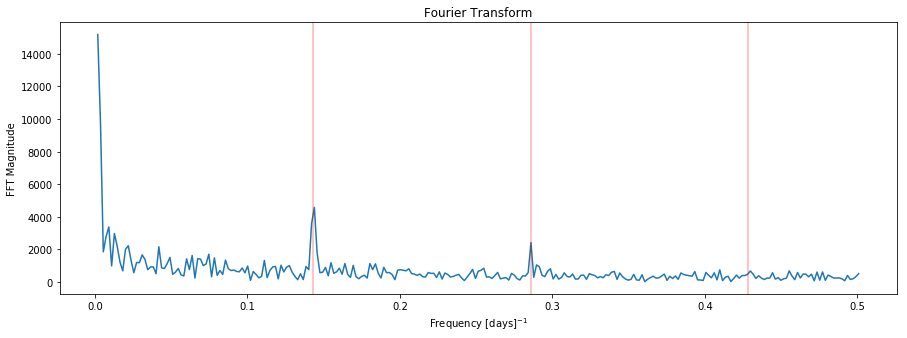

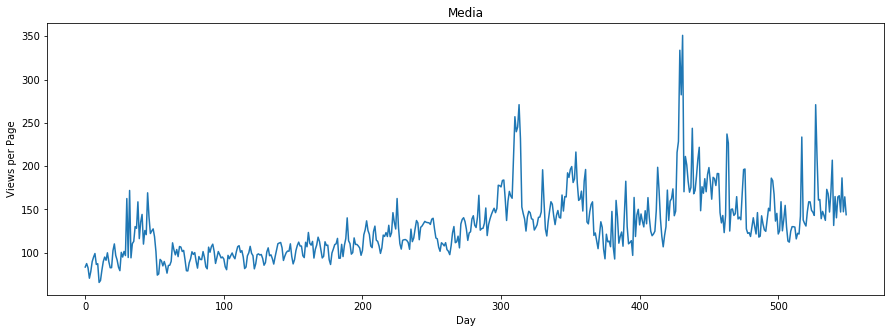

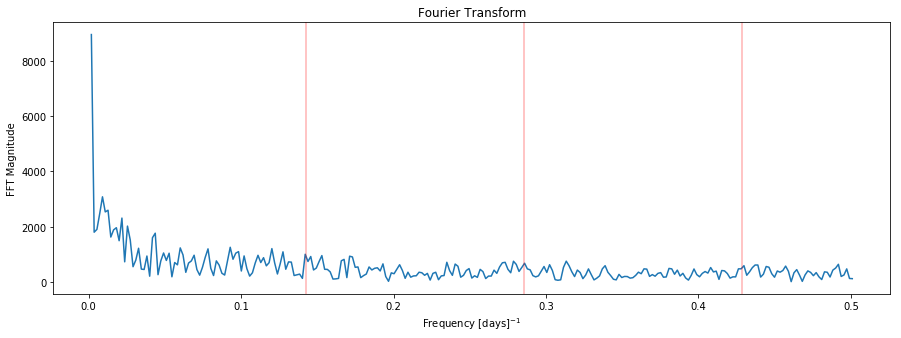

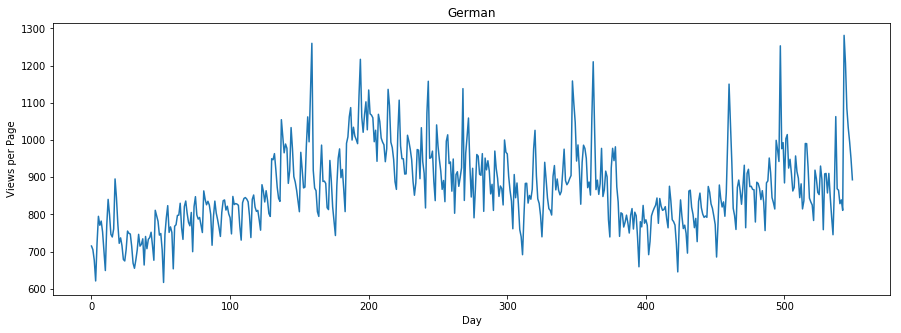

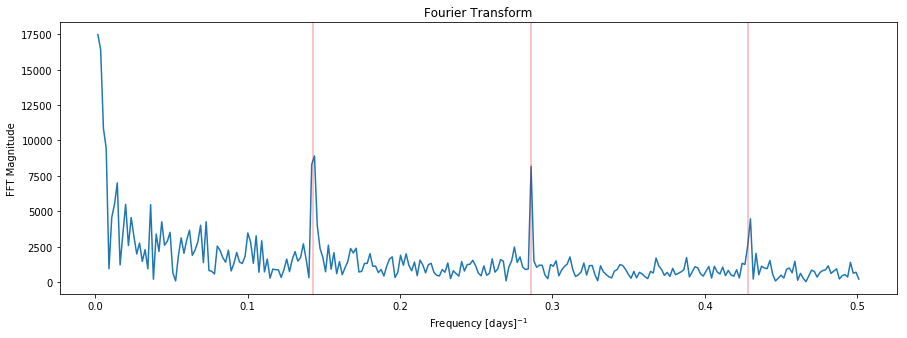

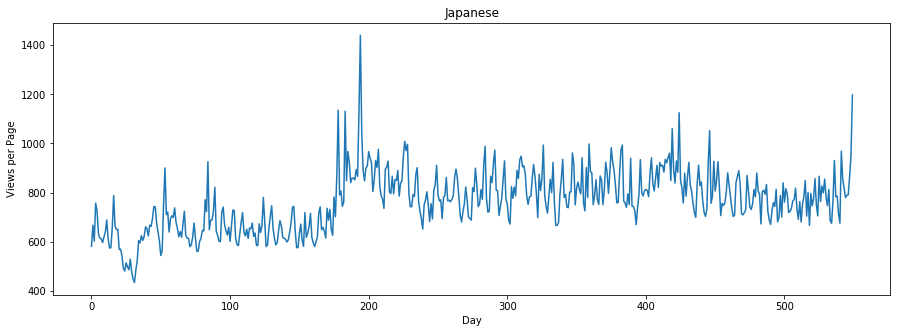

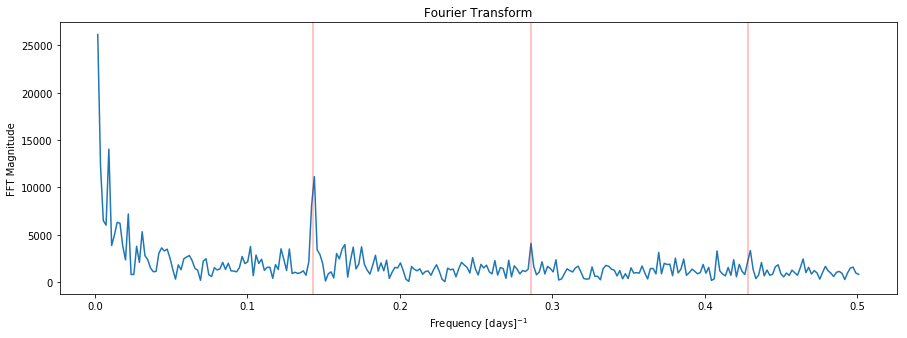

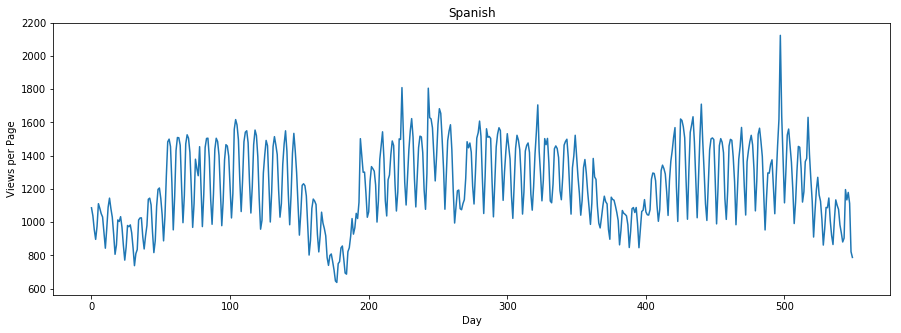

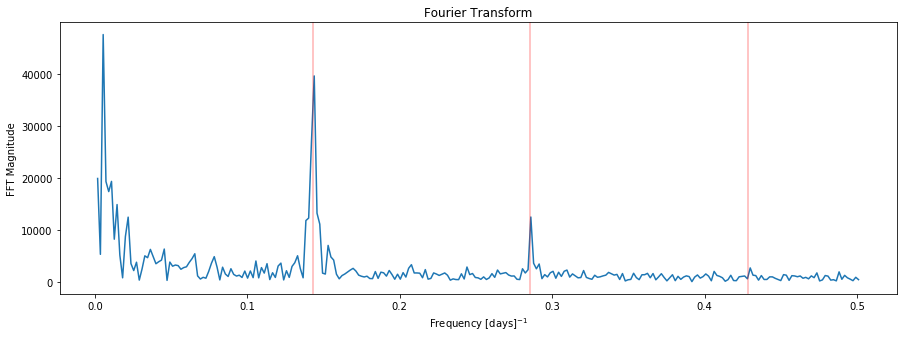

In [74]:
from scipy.fftpack import fft
def plot_with_fft(key):

    fig = plt.figure(1,figsize=[15,5])
    plt.ylabel('Views per Page')
    plt.xlabel('Day')
    plt.title(labels[key])
    plt.plot(days,sums[key],label = labels[key] )
    
    fig = plt.figure(2,figsize=[15,5])
    fft_complex = fft(sums[key])
    #print(fft_complex)
    fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_complex]
    #print(fft_mag)
    #print(days)
    fft_xvals = [float(day)/ float(days[-1]) for day in days]
    #print(fft_xvals)
    npts = len(fft_xvals) // 2 + 1
    fft_mag = fft_mag[:npts]
    fft_xvals = fft_xvals[:npts]
        
    plt.ylabel('FFT Magnitude')
    plt.xlabel(r"Frequency [days]$^{-1}$")
    plt.title('Fourier Transform')
    plt.plot(fft_xvals[1:],fft_mag[1:],label = labels[key] )
    # Draw lines at 1, 1/2, and 1/3 week periods
    plt.axvline(x=1./7,color='red',alpha=0.3)
    plt.axvline(x=2./7,color='red',alpha=0.3)
    plt.axvline(x=3./7,color='red',alpha=0.3)

    plt.show()

#plot_with_fft(key='ru')
for key in sums:
    #print(key)
    plot_with_fft(key)
    #plt.show()

From this we see that while the Spanish data has the strongest periodic features, most of the other languages show some periodicity as well. For some reason the Russian and media data do not seem to show much. I plotted red lines where a period of 1, 1/2, and 1/3 week would appear. We see that the periodic features are mainly at 1 and 1/2 week. This is not surprising since browsing habits may differ on weekdays compared to weekends, leading to peaks in the FFTs at frequencies of n/(1 week) for integer n. So, we've learned now that page views are not at all smooth. There is some regular variation from day to day, but there are also large effects that can happen quite suddenly. A model likely will not be able to predict the sudden spikes unless it can be fed more information about what is going on in the world that day.

In [75]:
def plot_entry(key,idx):
    data = lang_sets[key].iloc[idx,1:]
    fig = plt.figure(1,figsize=(10,5))
    plt.plot(days,data)
    plt.xlabel('day')
    plt.ylabel('views')
    plt.title(train.iloc[lang_sets[key].index[idx],0])
    
    plt.show()

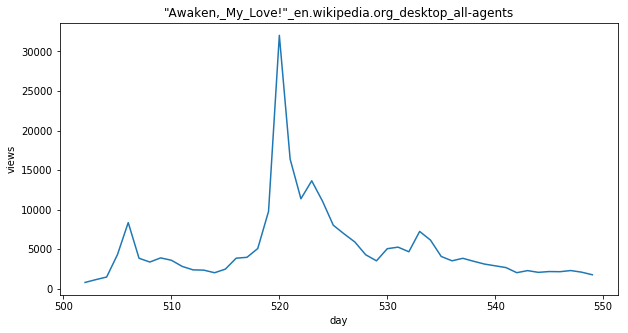

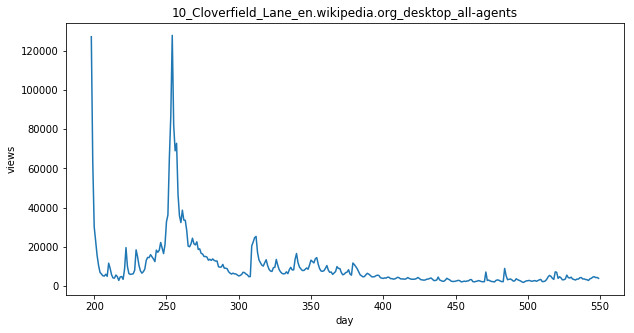

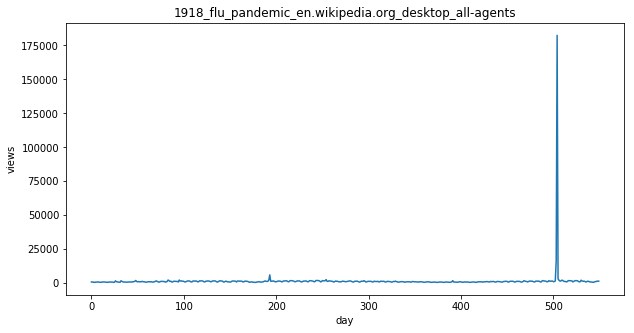

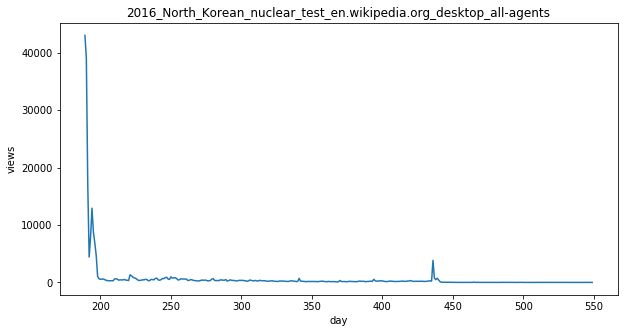

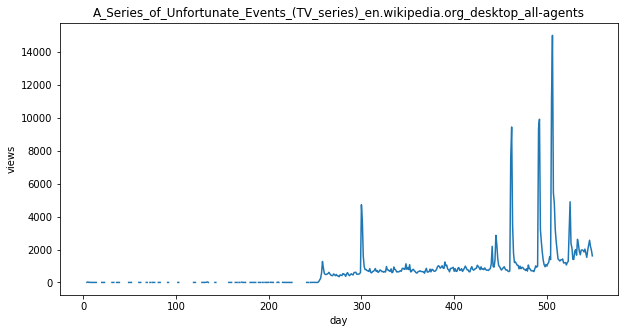

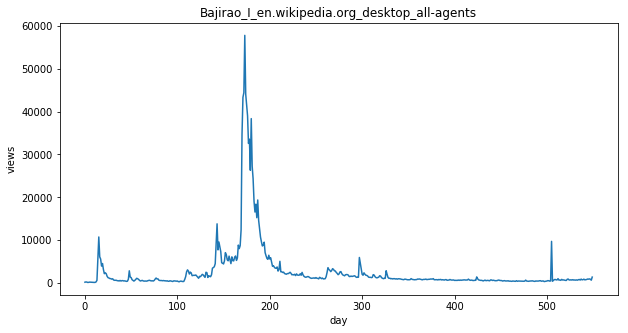

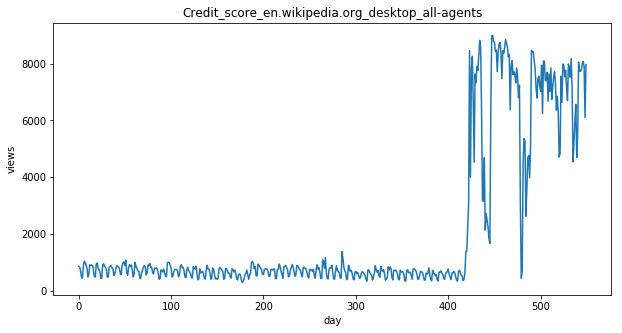

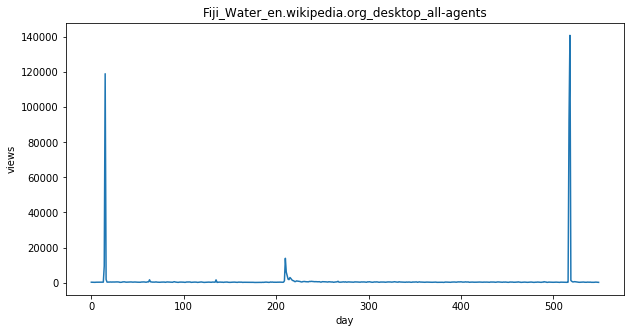

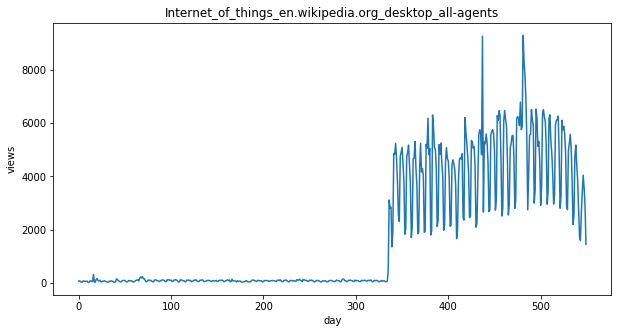

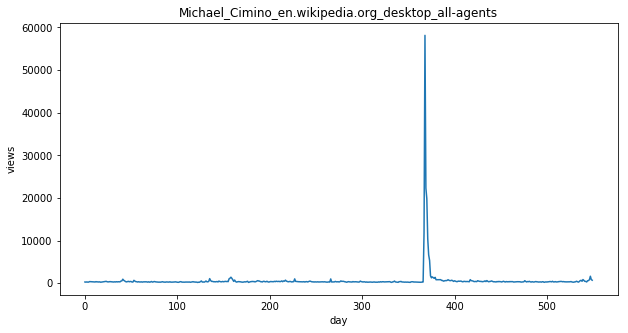

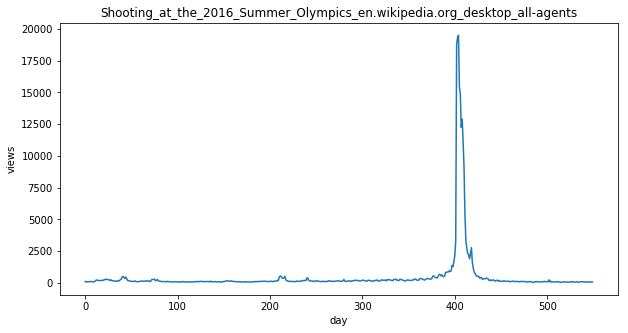

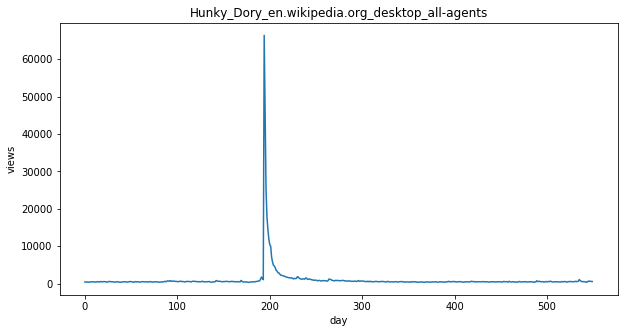

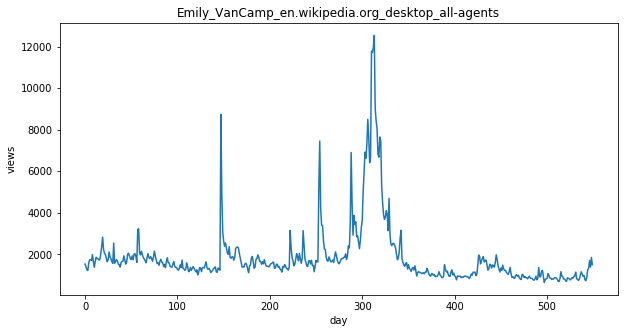

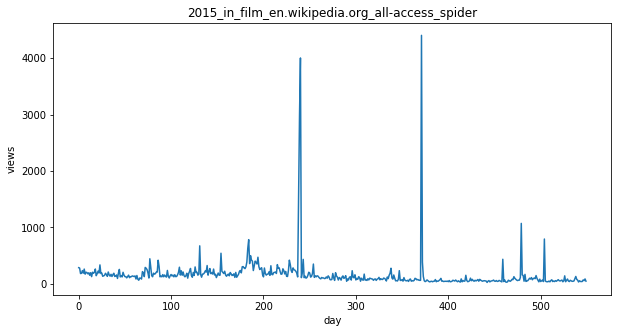

In [76]:
idx = [1, 5, 10, 50, 100, 250,500, 750,1000,1500,2000,3000,4000,5000]
for i in idx:
    plot_entry('en',i)

We see that for individual pages, the data is also not smooth. There are sudden gigantic spikes, large shifts in the mean number of views, and other things. We can also clearly see the effects of current events on Wikipedia views.

The 2016 North Korean nuclear test occurred, and a Wikipedia page was quickly constructed and received a huge number of views in a short time. The number of views mostly decayed away in 1 or 2 weeks.

Hunky Dory received a large number of viewers around the beginning of 2016, corresponding to the death of David Bowie.

The page about the shooting competition at the 2016 Olympics had a small number of views and then suddenly a lot right around the Olympics.

There are also some oddities, like two huge spikes in the data for Fiji Water, and the sudden long-term increases in traffic to "Internet of Things" and "Credit score." Maybe there were some news stories about Fiji water on those days. For the others, maybe there was a change in search engine behavior or maybe some new links appeared in very visible locations.

Now I'll look at some Spanish entries.

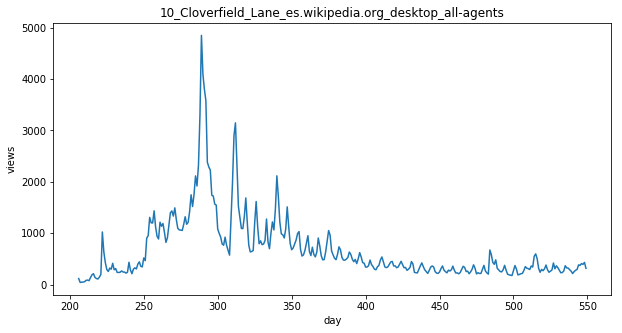

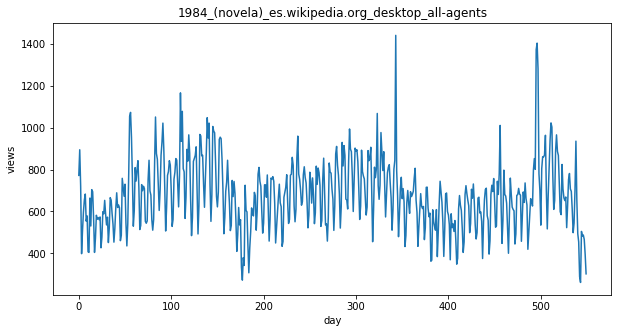

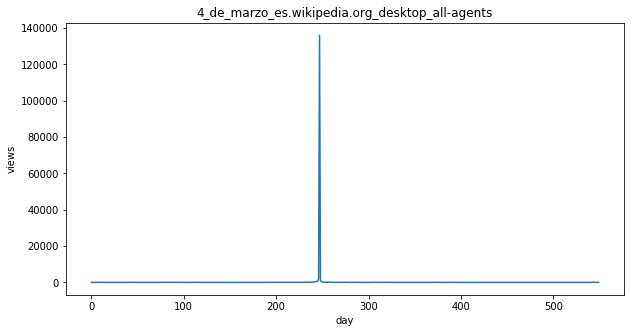

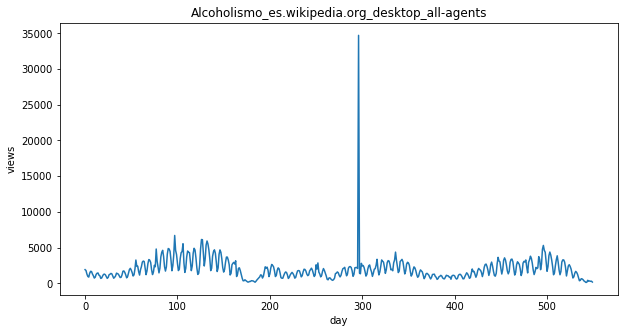

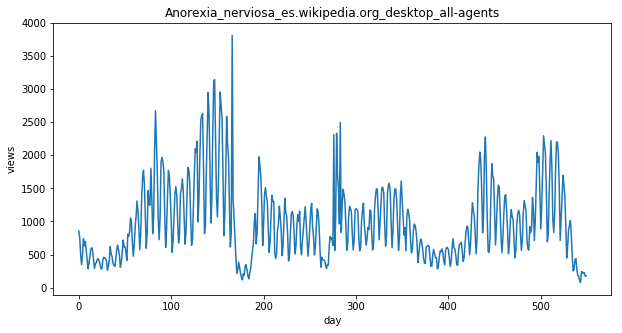

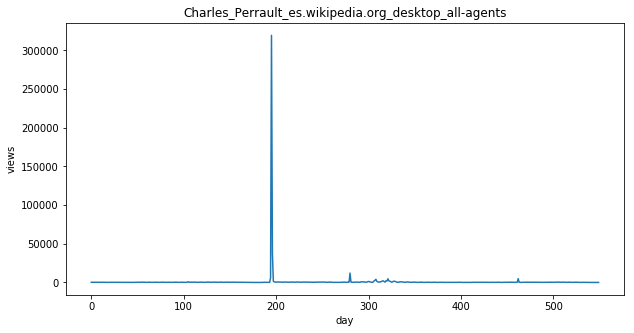

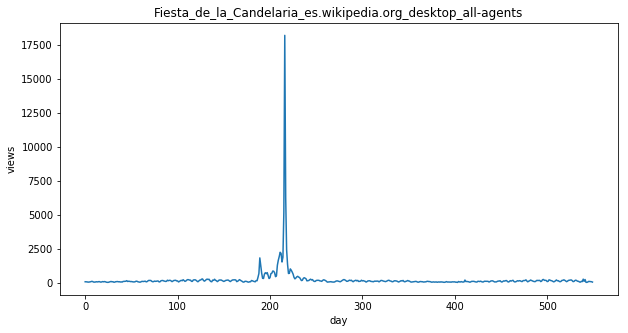

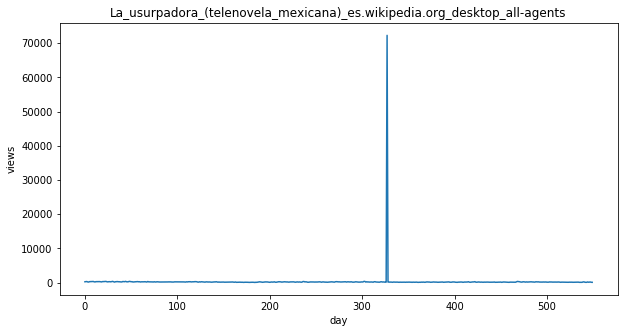

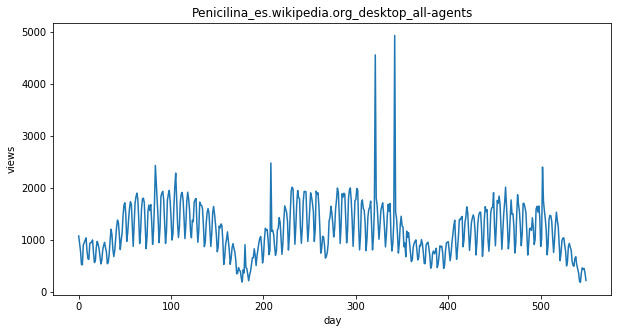

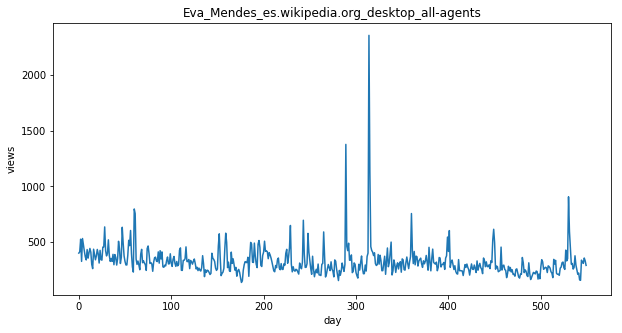

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 720x360 with 1 Axes>

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 720x360 with 1 Axes>

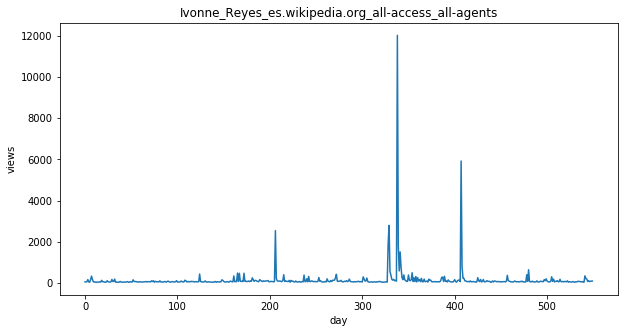

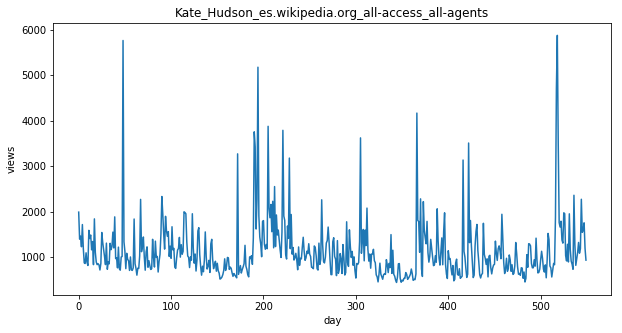

In [77]:
idx = [1, 5, 10, 50, 100, 250,500, 750,1001,1500,2000,3000,4000,5000]
for i in idx:
    plot_entry('es',i)

This shows even more extreme short-term spikes than the English data. If some of these are just one or two days before reverting back to the mean, they may be a sign that something is wrong with the data. To deal with extremely short spikes, which we almost certainly won't be able to predict, something like a median filter can be used to remove them.

We see something very curious here, though. We see that a very strong periodic structure appears only in certain pages. The plots showing the strongest periodic structure actually all have something in common - they all seem to have something to do with health topics. The weekly structure might make sense if it's related to people seeing doctors and then consulting Wikipedia. The longer (~6 month) structure is harder to explain, especially without having any browser demographic information.

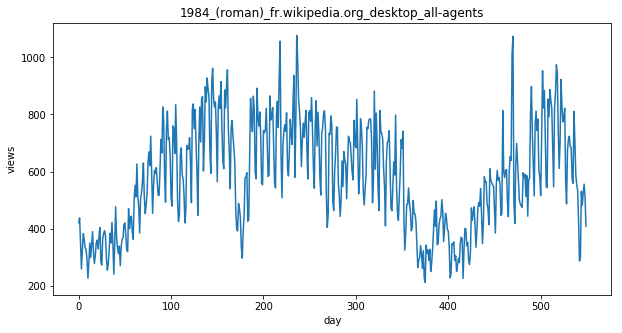

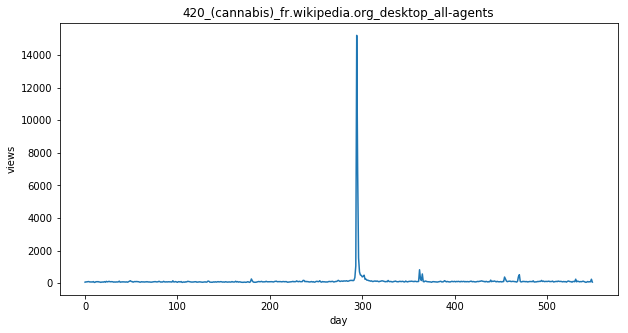

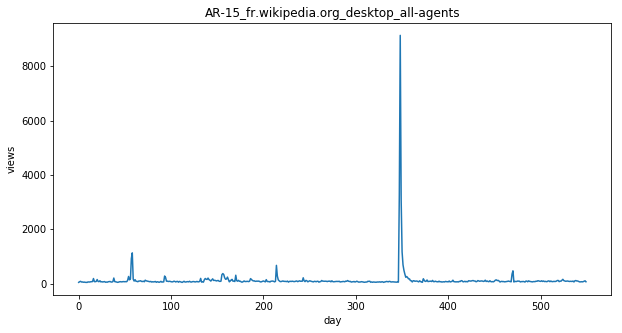

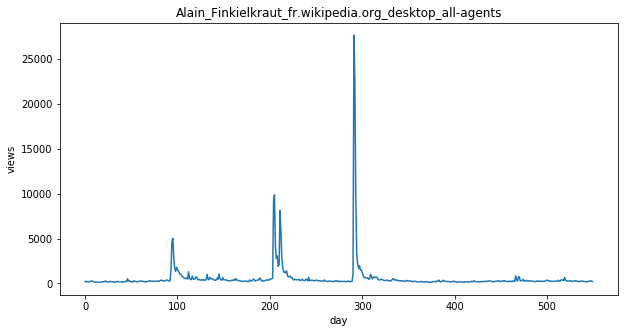

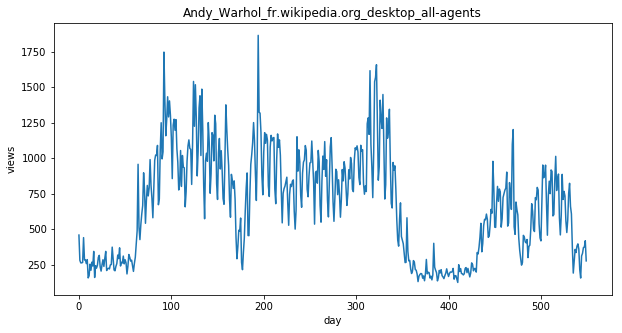

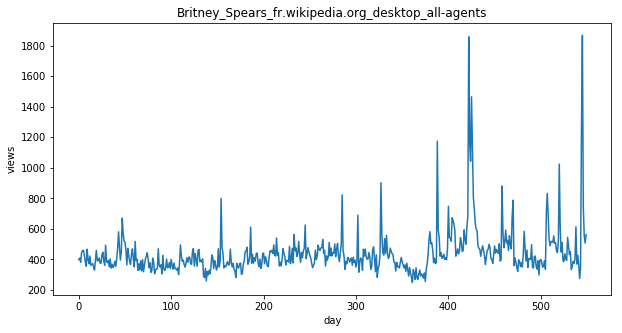

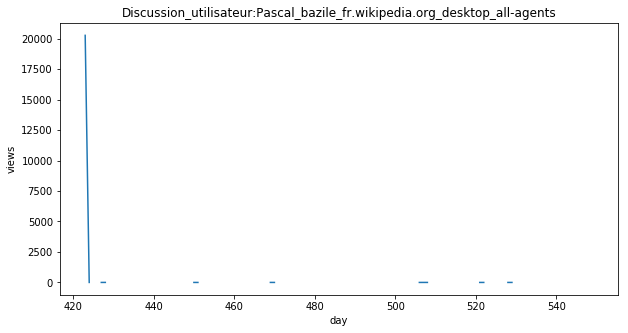

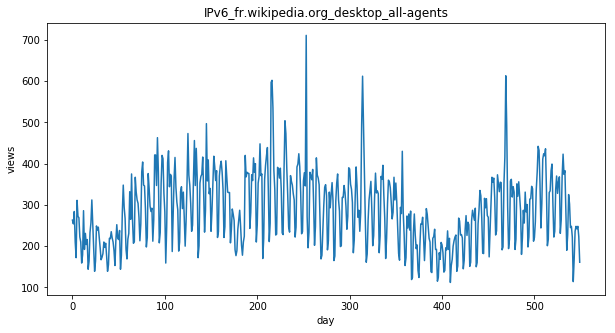

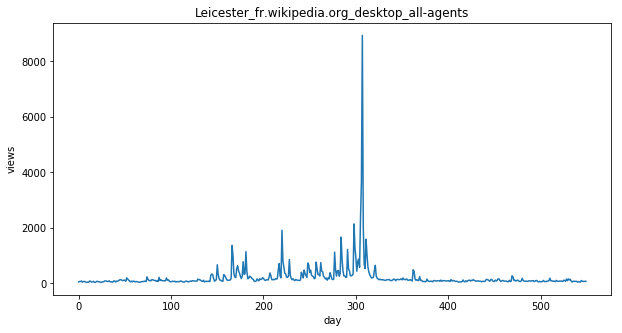

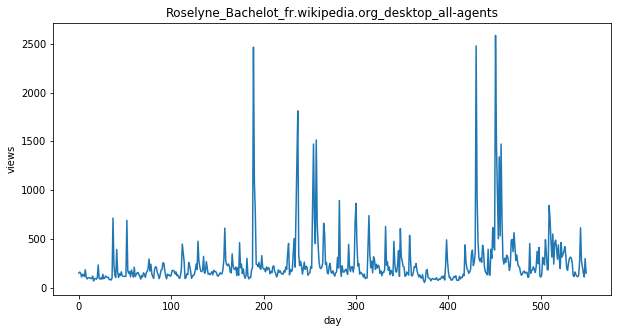

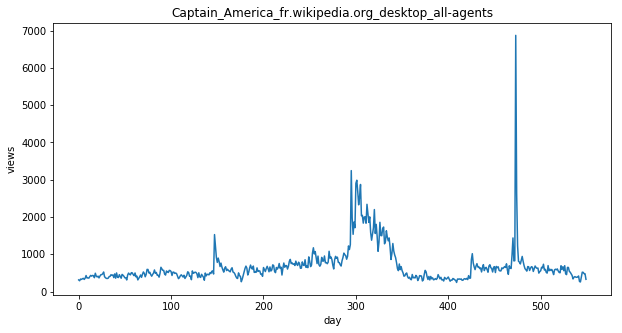

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 720x360 with 1 Axes>

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 720x360 with 1 Axes>

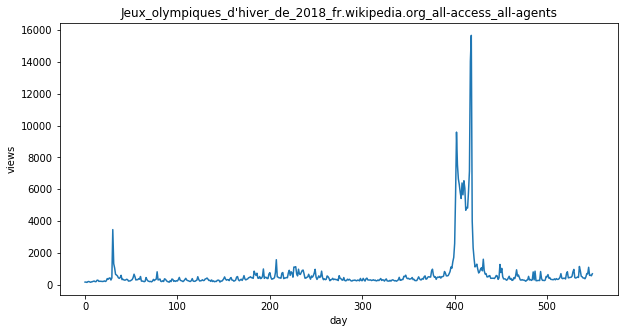

In [78]:
idx = [1, 5, 10, 50, 100, 250,500, 750,1001,1500,2000,3000,4000,5000]
for i in idx:
    plot_entry('fr',i)

The French plots show more of the same. Wikipedia views again are hugely dependent on whether or not something is in the news. Leicester FC won the Premier League and received many page views around the championship. The Olympics caused a huge spike in traffic to their page. Christmas actually shows some interesting structure, with views steadily increasing throughout Advent.

In [79]:
npages = 5
top_pages = {}
for key in lang_sets:
    print(key)
    sum_set = pd.DataFrame(lang_sets[key][['Page']])
    sum_set['total'] = lang_sets[key].sum(axis=1)
    sum_set = sum_set.sort_values('total',ascending=False)
    print(sum_set.head(10))
    top_pages[key] = sum_set.index[0]
    print('\n\n')

ru
                                                     Page         total
99322   Заглавная_страница_ru.wikipedia.org_all-access...  1.086019e+09
103123  Заглавная_страница_ru.wikipedia.org_desktop_al...  7.428800e+08
17670   Заглавная_страница_ru.wikipedia.org_mobile-web...  3.279304e+08
99537   Служебная:Поиск_ru.wikipedia.org_all-access_al...  1.037643e+08
103349  Служебная:Поиск_ru.wikipedia.org_desktop_all-a...  9.866417e+07
100414  Служебная:Ссылки_сюда_ru.wikipedia.org_all-acc...  2.510200e+07
104195  Служебная:Ссылки_сюда_ru.wikipedia.org_desktop...  2.505816e+07
97670   Special:Search_ru.wikipedia.org_all-access_all...  2.437457e+07
101457  Special:Search_ru.wikipedia.org_desktop_all-ag...  2.195847e+07
98301   Служебная:Вход_ru.wikipedia.org_all-access_all...  1.216259e+07



fr
                                                     Page        total
27330   Wikipédia:Accueil_principal_fr.wikipedia.org_a...  868480667.0
55104   Wikipédia:Accueil_principal_fr.wikipedia.org_m...

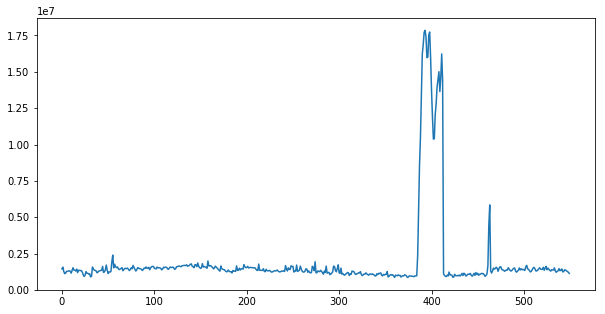

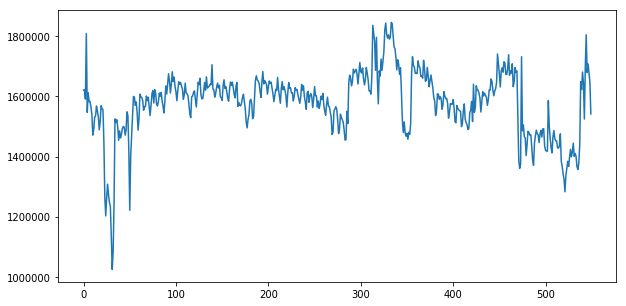

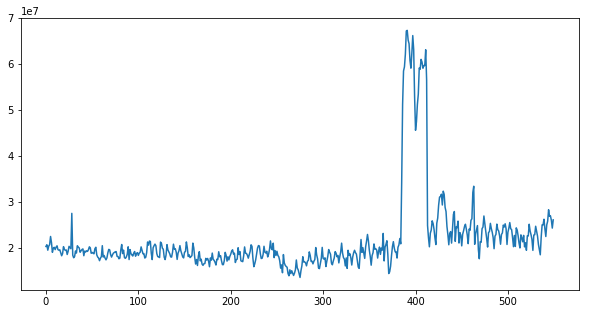

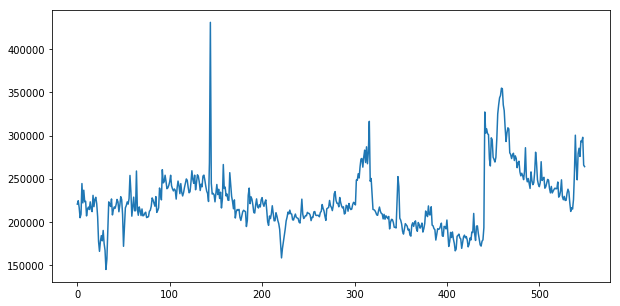

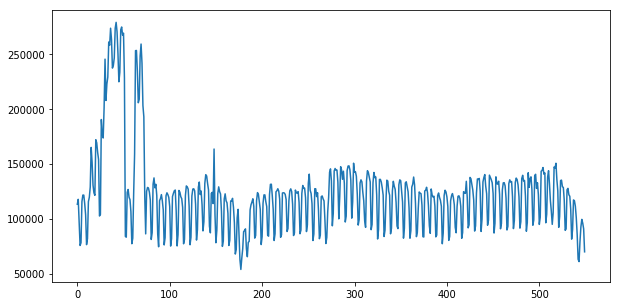

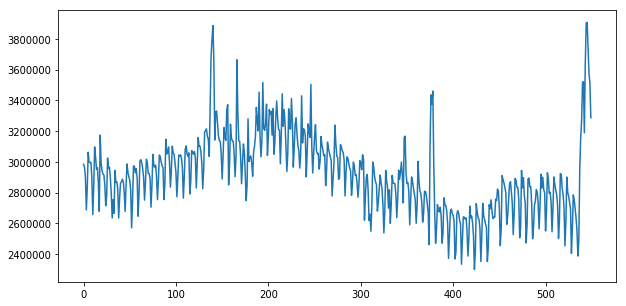

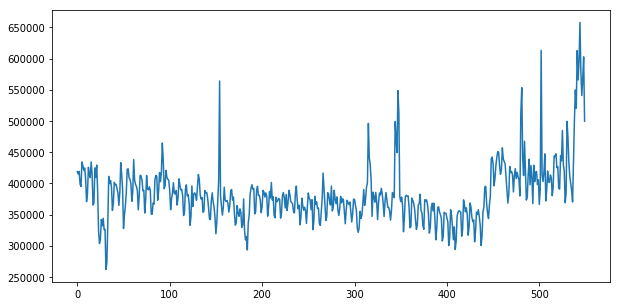

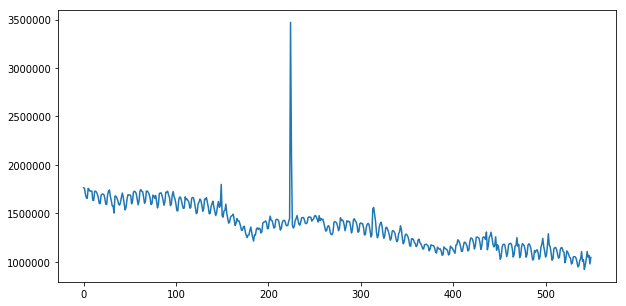

In [95]:
for key in top_pages:
    fig = plt.figure(1,figsize=(10,5))
    cols = train.columns
    cols = cols[1:-1]
    data = train.loc[top_pages[key],cols]
    
    #plt.xlabel(unicode('Days'))
    #ax.set_xlabel(u"something at 55°")
    #plt.ylabel(unicode('Views'))
    plt.plot(days,data)
    #plt.title(unicode(train.loc[top_pages[key],'Page']))
    plt.show()

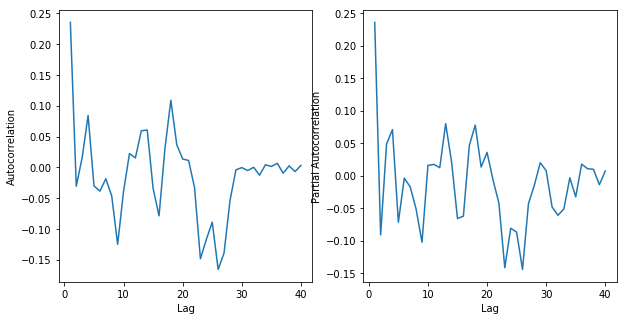

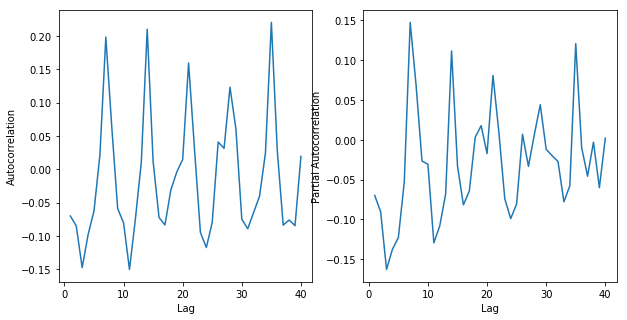

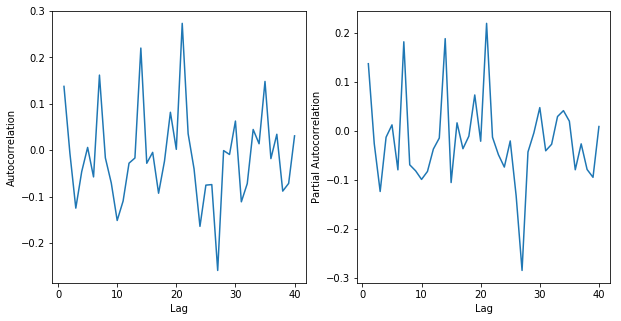

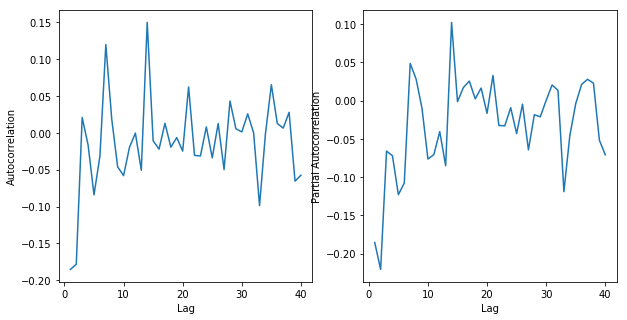

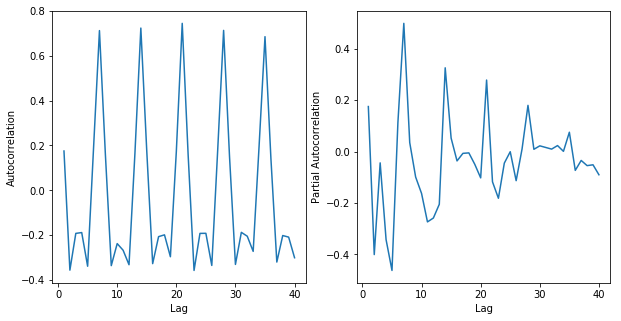

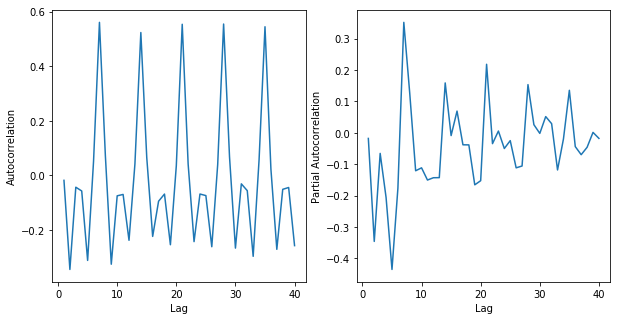

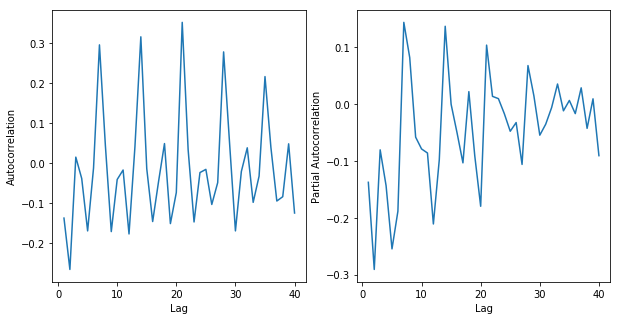

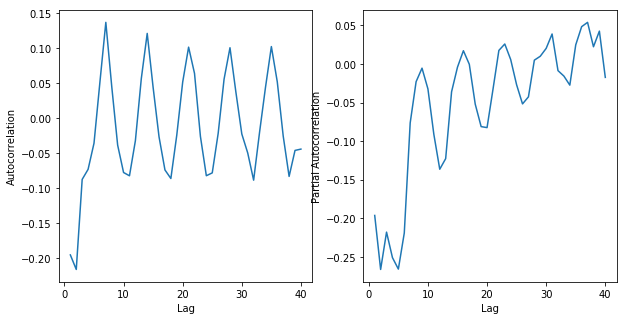

In [97]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

for key in top_pages:
    fig = plt.figure(1,figsize=[10,5])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    cols = train.columns[1:-1]
    data = np.array(train.loc[top_pages[key],cols])
    data_diff = [data[i] - data[i-1] for i in range(1,len(data))]
    autocorr = acf(data_diff)
    pac = pacf(data_diff)

    x = [x for x in range(len(pac))]
    ax1.plot(x[1:],autocorr[1:])

    ax2.plot(x[1:],pac[1:])
    ax1.set_xlabel(u'Lag')
    ax1.set_ylabel(u'Autocorrelation')
    #ax1.set_title(train.loc[top_pages[key],'Page'])

    ax2.set_xlabel(u'Lag')
    ax2.set_ylabel(u'Partial Autocorrelation')
    plt.show()

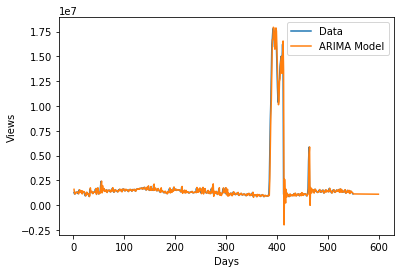

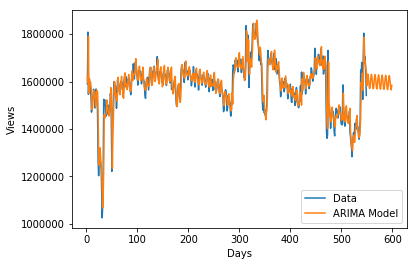

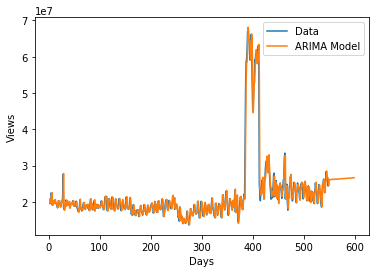

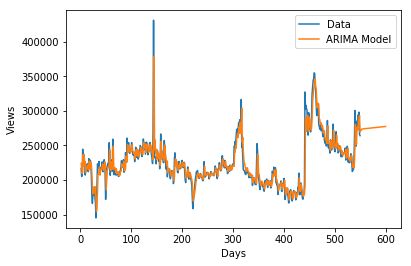

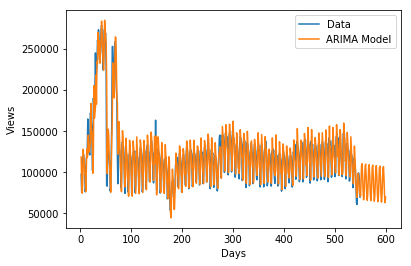

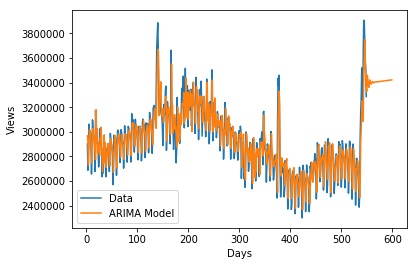

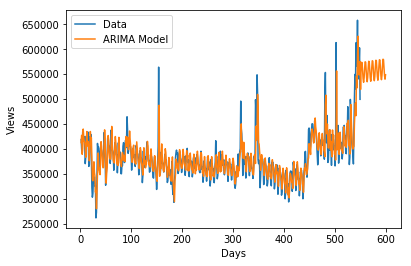

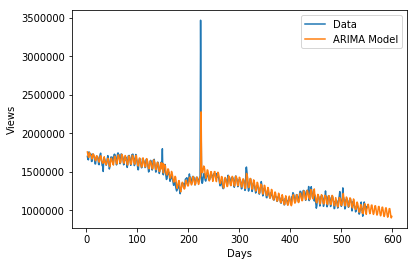

In [100]:
from statsmodels.tsa.arima_model import ARIMA
import warnings

cols = train.columns[1:-1]
for key in top_pages:
    data = np.array(train.loc[top_pages[key],cols],'f')
    result = None
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        try:
            arima = ARIMA(data,[2,1,4])
            result = arima.fit(disp=False)
        except:
            try:
                arima = ARIMA(data,[2,1,2])
                result = arima.fit(disp=False)
            except:
                print(train.loc[top_pages[key],'Page'])
                print('\tARIMA failed')
    #print(result.params)
    pred = result.predict(2,599,typ='levels')
    x = [i for i in range(600)]
    i=0

    plt.plot(x[2:len(data)],data[2:] ,label='Data')
    plt.plot(x[2:],pred,label='ARIMA Model')
    #plt.title(train.loc[top_pages[key],'Page'])
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.legend()
    plt.show()

We see that the ARIMA model in some cases is able to predict the weekly substructure of the signal, which is good. In other cases it seems to just give a linear fit. This is potentially very useful.

However, if we just blindly apply the ARIMA model to the whole dataset, the results are not nearly as good as just using a basic median model. It still seems to have some interesting properties, so maybe we can combine this with another model to get better results. Or, maybe we can find some subset of data where we expect ARIMA to work better than our other models.

Unfortunately, the ARIMA classes in statsmodels are extremely slow, so to do this you'll probably want to parallelize this.

In [3]:
train = pd.read_csv(r'C:\Users\User\Desktop\web-traffic-time-series-forecasting\train_2.csv\train_2.csv',engine='python')

In [4]:
def get_language(page):
    res = re.search('([a-z][a-z])(.wikipedia.org)',page)
    #print(res.group(0))
    if res:
        #print(res.group(0))
        return res.group(0)[0:2]
    return 'na'
get_language(train['Page'][0])
train['lang'] = train.Page.map(get_language)
#train['Page'][0]
train.head()


lang_sets = {}
lang_sets['en'] = train[train.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train[train.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train[train.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train[train.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train[train.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train[train.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train[train.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train[train.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]



npages = 5
top_pages = {}
for key in lang_sets:
    print(key)
    sum_set = pd.DataFrame(lang_sets[key][['Page']])
    sum_set['total'] = lang_sets[key].sum(axis=1)
    sum_set = sum_set.sort_values('total',ascending=False)
    print(sum_set.head(10))
    top_pages[key] = sum_set.index[0]
    print('\n\n')

ru
                                                     Page         total
99322   Заглавная_страница_ru.wikipedia.org_all-access...  1.301733e+09
103123  Заглавная_страница_ru.wikipedia.org_desktop_al...  8.696247e+08
17670   Заглавная_страница_ru.wikipedia.org_mobile-web...  4.095098e+08
99537   Служебная:Поиск_ru.wikipedia.org_all-access_al...  1.446759e+08
103349  Служебная:Поиск_ru.wikipedia.org_desktop_all-a...  1.317838e+08
100414  Служебная:Ссылки_сюда_ru.wikipedia.org_all-acc...  3.869087e+07
104195  Служебная:Ссылки_сюда_ru.wikipedia.org_desktop...  3.864014e+07
97670   Special:Search_ru.wikipedia.org_all-access_all...  3.014651e+07
101457  Special:Search_ru.wikipedia.org_desktop_all-ag...  2.684726e+07
98301   Служебная:Вход_ru.wikipedia.org_all-access_all...  1.557323e+07



fr
                                                     Page         total
27330   Wikipédia:Accueil_principal_fr.wikipedia.org_a...  1.151181e+09
55104   Wikipédia:Accueil_principal_fr.wikipedia.org_m.

ValueError: x and y must have same first dimension, but have shapes (801L,) and (598L,)

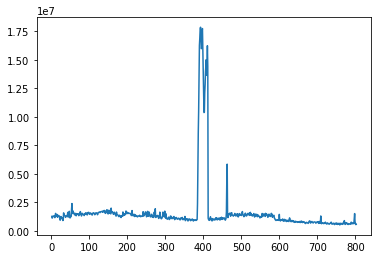

In [8]:
from statsmodels.tsa.arima_model import ARIMA
import warnings

cols = train.columns[1:-1]
for key in top_pages:
    data = np.array(train.loc[top_pages[key],cols],'f')
    result = None
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        try:
            arima = ARIMA(data,[2,1,4])
            result = arima.fit(disp=False)
        except:
            try:
                arima = ARIMA(data,[2,1,2])
                result = arima.fit(disp=False)
            except:
                print(train.loc[top_pages[key],'Page'])
                print('\tARIMA failed')
    #print(result.params)
    pred = result.predict(2,599,typ='levels')
    x = [i for i in range(803)]
    i=0

    plt.plot(x[2:len(data)],data[2:] ,label='Data')
    plt.plot(x[2:],pred,label='ARIMA Model')
    #plt.title(train.loc[top_pages[key],'Page'])
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.legend()
    plt.show()